# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API key
api_key = api_keys.api_key

# URL for API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

data = []

print("API Call Log")
print("-------------------------")

count = 1

# Loop through all cities
for city in cities:
 
    # Print log
    print(f"Processesing city {count}: {city}")
    
    # API call
    url_city = f"{url}&q={city}"
    
    try:
        weather = requests.get(url_city).json()
        lat = weather["coord"]['lat']
        lon = weather['coord']['lon']
        max_temp = weather["main"]["temp_max"]
        hum = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        
        # Add data to list
        data.append({
            "City": city,
            "Country": country,
            "Latatude": lat,
            "Longitute": lon,
            "Maximum Temperature": max_temp,
            "Humidity": hum,
            "Cloud %": clouds,
            "Wind": wind,
        })
        
    # Error handling
    except:
        pass
        
    # Increment counter
    count = count + 1
    
print("-------------------")
print("API Calls Complete")

    
        


API Call Log
-------------------------
Processesing city 1: ugoofaaru
Processesing city 2: mogadishu
Processesing city 3: saskylakh
Processesing city 4: carnarvon
Processesing city 5: mar del plata
Processesing city 6: kurkino
Processesing city 7: ushuaia
Processesing city 8: grand river south east
Processesing city 9: salalah
Processesing city 10: bowen
Processesing city 11: puerto ayora
Processesing city 12: hobart
Processesing city 13: alta floresta
Processesing city 14: souillac
Processesing city 15: west bay
Processesing city 16: havelock
Processesing city 17: jamestown
Processesing city 18: busselton
Processesing city 19: louisbourg
Processesing city 20: pisco
Processesing city 21: nikolskoye
Processesing city 22: thompson
Processesing city 23: iquitos
Processesing city 24: cuiluan
Processesing city 25: ribeira grande
Processesing city 26: avarua
Processesing city 27: torbay
Processesing city 28: sola
Processesing city 29: ahipara
Processesing city 30: barrow
Processesing city 31

Processesing city 257: kaeo
Processesing city 258: banswara
Processesing city 259: atka
Processesing city 260: cabedelo
Processesing city 261: el ejido
Processesing city 262: saint-augustin
Processesing city 263: geraldton
Processesing city 264: san cristobal
Processesing city 265: merauke
Processesing city 266: dolbeau
Processesing city 267: yulara
Processesing city 268: lithgow
Processesing city 269: neustadt
Processesing city 270: mahebourg
Processesing city 271: tiznit
Processesing city 272: felipe carrillo puerto
Processesing city 273: balkanabat
Processesing city 274: peniche
Processesing city 275: dawson
Processesing city 276: clyde river
Processesing city 277: acarau
Processesing city 278: alofi
Processesing city 279: krasnyye barrikady
Processesing city 280: fortuna
Processesing city 281: san julian
Processesing city 282: husavik
Processesing city 283: maryville
Processesing city 284: plymouth
Processesing city 285: noshiro
Processesing city 286: goundam
Processesing city 287:

Processesing city 511: agalatovo
Processesing city 512: vardo
Processesing city 513: poronaysk
Processesing city 514: yarada
Processesing city 515: bentiu
Processesing city 516: yelkhovka
Processesing city 517: ye
Processesing city 518: calderitas
Processesing city 519: san vicente
Processesing city 520: nepa nagar
Processesing city 521: voskresenskoye
Processesing city 522: rosignol
Processesing city 523: xuddur
Processesing city 524: turtkul
Processesing city 525: uglegorsk
Processesing city 526: dauphin
Processesing city 527: east wenatchee bench
Processesing city 528: antsohihy
Processesing city 529: tijara
Processesing city 530: pafos
Processesing city 531: sorvag
Processesing city 532: saint pete beach
Processesing city 533: kawana waters
Processesing city 534: puerto escondido
Processesing city 535: teguldet
Processesing city 536: evensk
Processesing city 537: nazare
Processesing city 538: ilulissat
Processesing city 539: moerai
Processesing city 540: moreno
Processesing city 54

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Conver to pandas
city_weather_df = pd.DataFrame(data)

city_weather_df.head()

# Export to a .csv
city_weather_df.to_csv("weather_data.csv")



In [5]:
city_weather_df.head()

,City,Cloud %,Country,Humidity,Latatude,Longitute,Maximum Temperature,Wind
0,ugoofaaru,100,MV,63,5.67,73.00,83.39,3.27
1,mogadishu,40,SO,73,2.04,45.34,77.00,13.87
2,saskylakh,0,RU,39,71.97,114.09,61.25,7.76
3,carnarvon,0,ZA,52,-30.97,22.13,40.91,9.28
4,mar del plata,100,AR,72,-46.43,-67.52,39.83,19.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

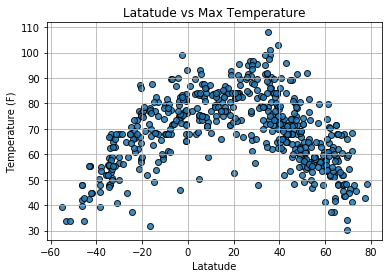

In [6]:
plt.scatter(city_weather_df["Latatude"], city_weather_df["Maximum Temperature"], edgecolor="black", alpha=0.85)
plt.title("Latatude vs Max Temperature")
plt.xlabel("Latatude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("images/plot1.png")
plt.show()

#### Latitude vs. Humidity Plot

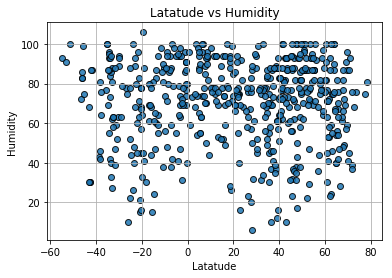

In [7]:
plt.scatter(city_weather_df["Latatude"], city_weather_df["Humidity"], edgecolor="black", alpha=0.85)
plt.title("Latatude vs Humidity")
plt.xlabel("Latatude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("images/plot2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

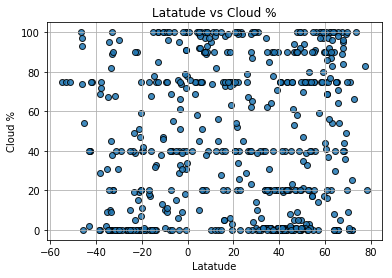

In [8]:
plt.scatter(city_weather_df["Latatude"], city_weather_df["Cloud %"], edgecolor="black", alpha=0.85)
plt.title("Latatude vs Cloud %")
plt.xlabel("Latatude")
plt.ylabel("Cloud %")
plt.grid()
plt.savefig("images/plot3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

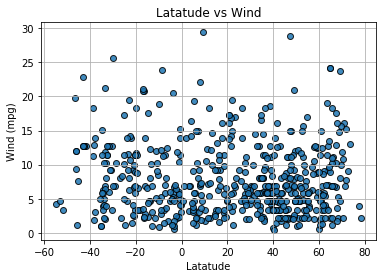

In [9]:
plt.scatter(city_weather_df["Latatude"], city_weather_df["Wind"], edgecolor="black", alpha=0.85)
plt.title("Latatude vs Wind")
plt.xlabel("Latatude")
plt.ylabel("Wind (mpg)")
plt.grid()
plt.savefig("images/plot4.png")
plt.show()